# End to End Time Series forecasting using ARIMA

In [1]:
#Data Import and cleaning

In [2]:
# Data and package Import
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
TempData = pd.read_csv('HCLTECH.csv')
TempData.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN


In [3]:
TempData.shape

(5198, 15)

In [4]:
TempData.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2844
Deliverable Volume     503
%Deliverble            503
dtype: int64

In [5]:
TempData.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [6]:
#Data Cleaning
HCLTechStockData = TempData.dropna()


HCLTechStockData.index = pd.to_datetime(HCLTechStockData.Date)

HCLTechStockData = HCLTechStockData["Prev Close"]['2013-01-01':'2013-12-2']
HCLTechStockData.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

In [7]:
HCLTechStockData.dtypes

dtype('float64')

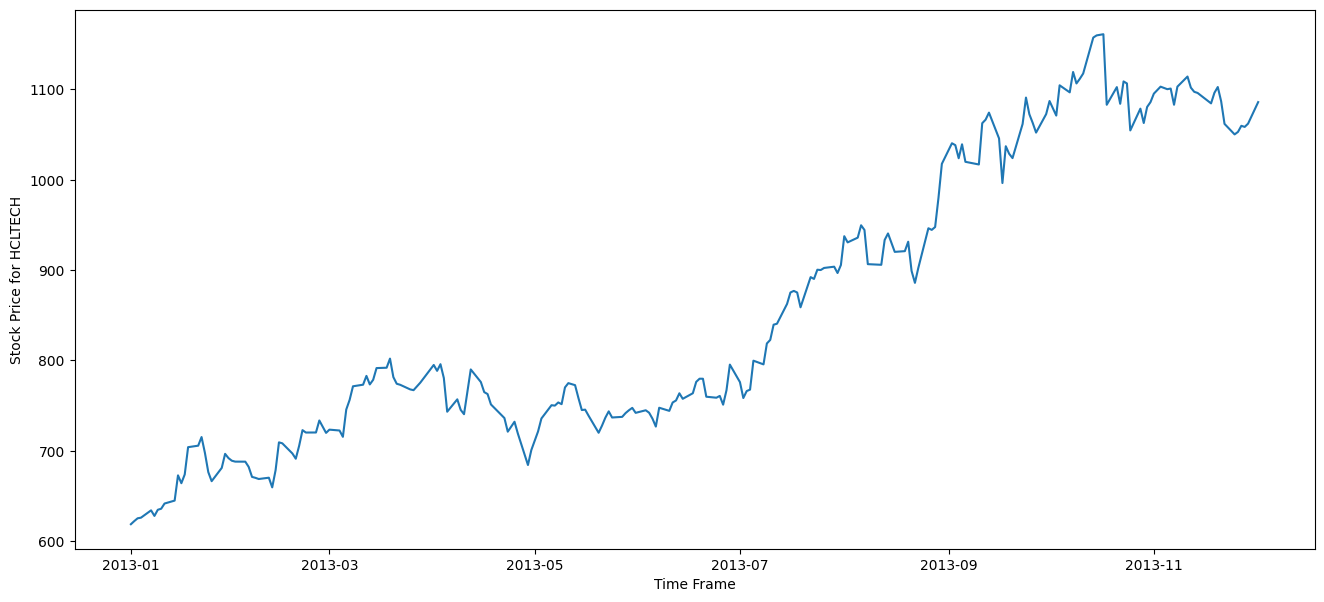

In [8]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HCLTECH')
ax1.plot(HCLTechStockData)

In [9]:
# Checking stationarity

In [10]:
# Method 1 -  Rolling Statistics
# Method 2 -  Duckey fuller

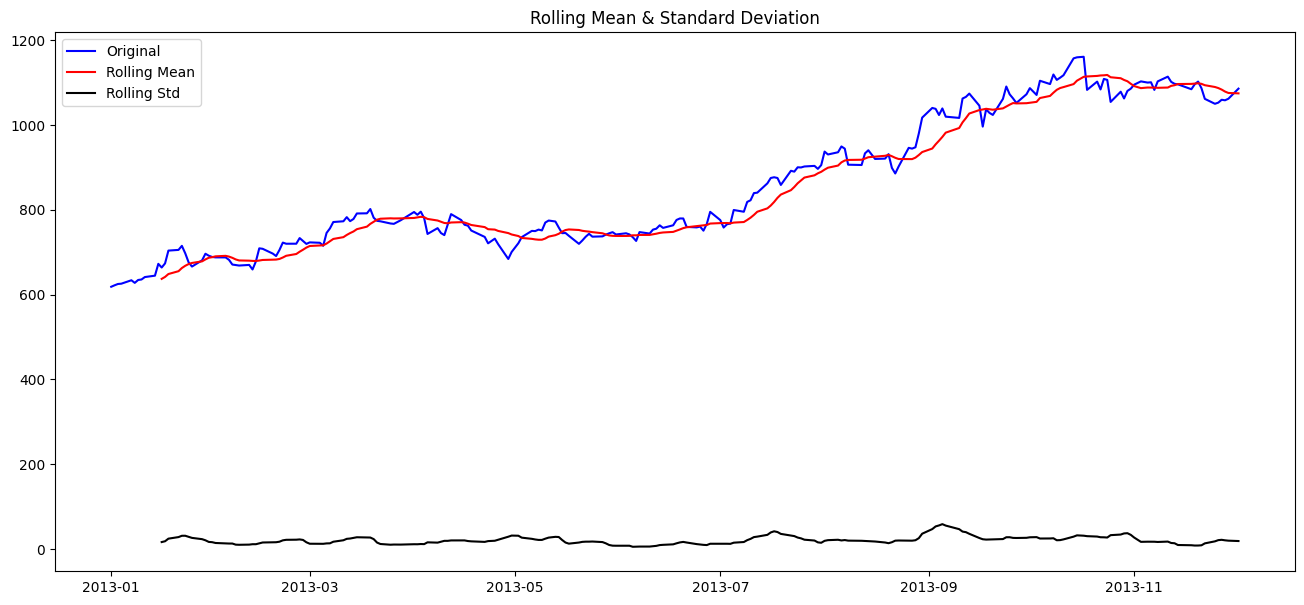

In [11]:
#Determing rolling statistics
rolLmean = HCLTechStockData.rolling(12).mean() # 12 entries
rolLstd = HCLTechStockData.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(HCLTechStockData, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# making Series Stationary

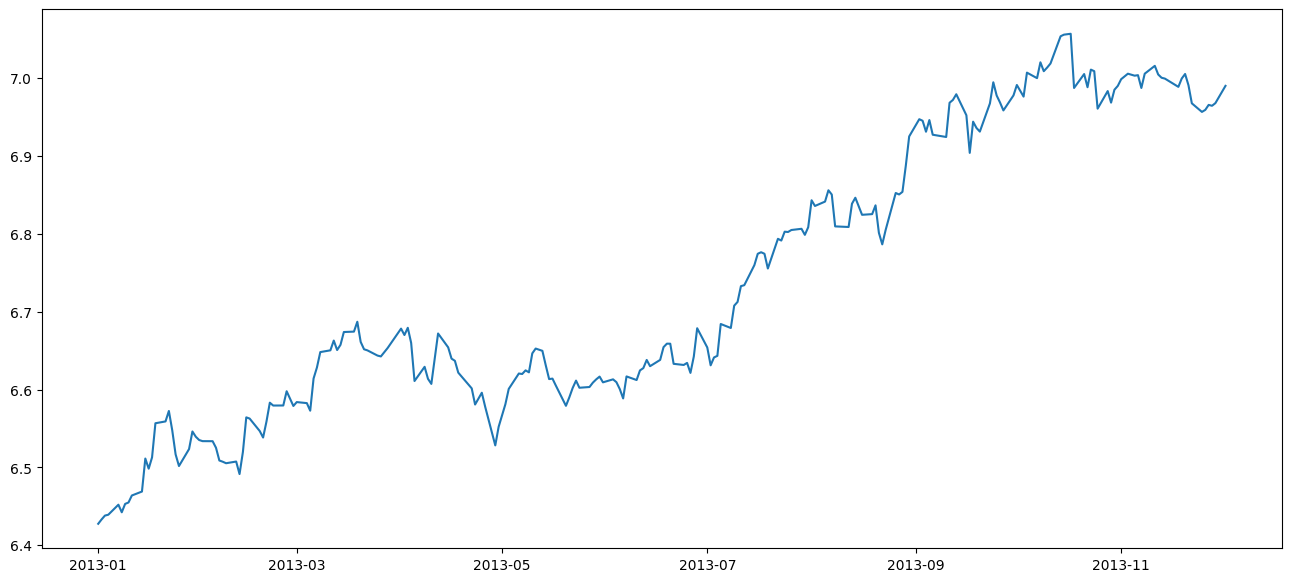

In [12]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(HCLTechStockData)#to transform to stationary from non-stationary
plt.plot(ts_log)

In [13]:
# Observation: even after doing log transformation, it is not becoming stationary. So we try to decompose
# into seasonal component

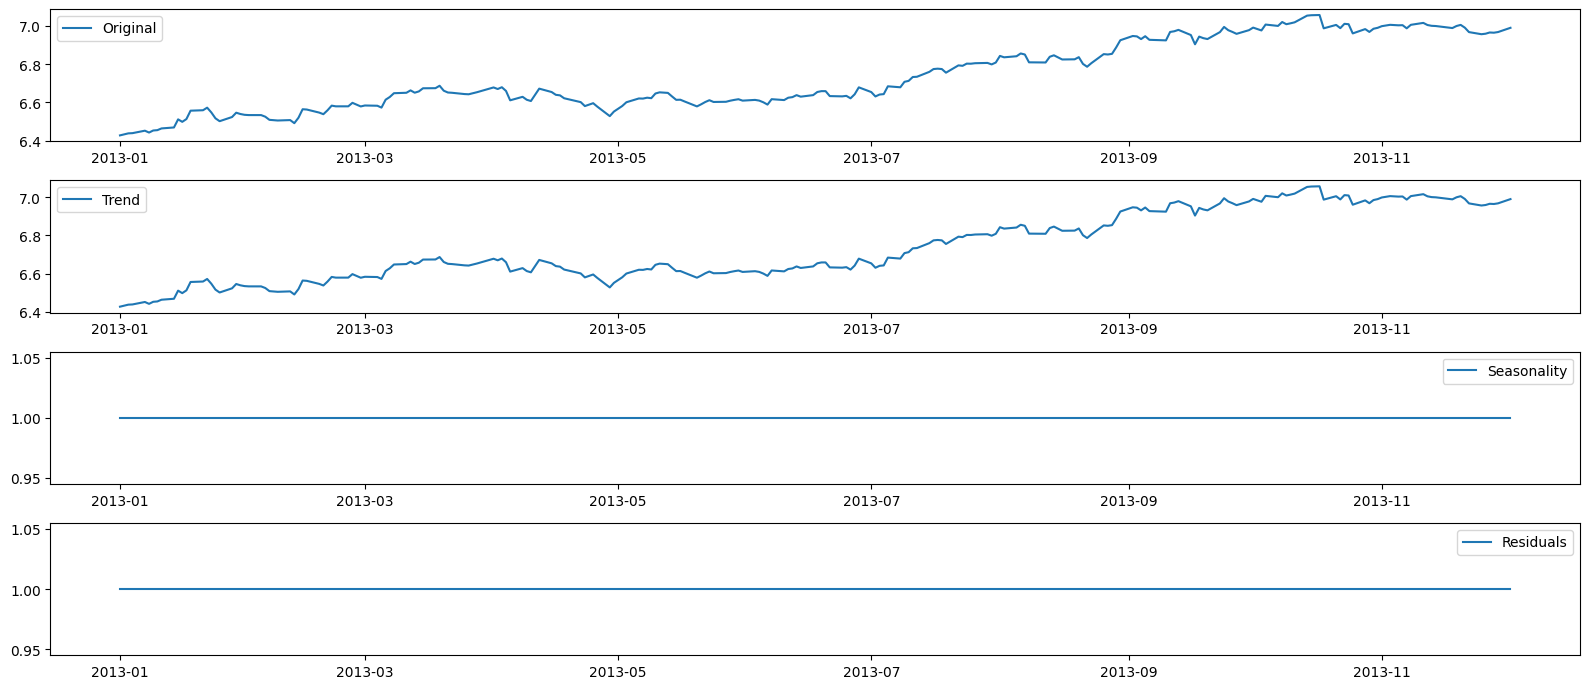

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
decomposition = seasonal_decompose(ts_log, period=1, model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposition results
plt.figure(figsize=(16, 7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [15]:
# Trend component is contributing more to the time series.
# We have tried log transformation. but TS is not becoming stationary. So we try to create a differenced TS.
# Differencing? I will shift the time series by 1 and subtract from the original TS.

In [16]:
# Why differncing? So that I can expect a stationarity in my TS.

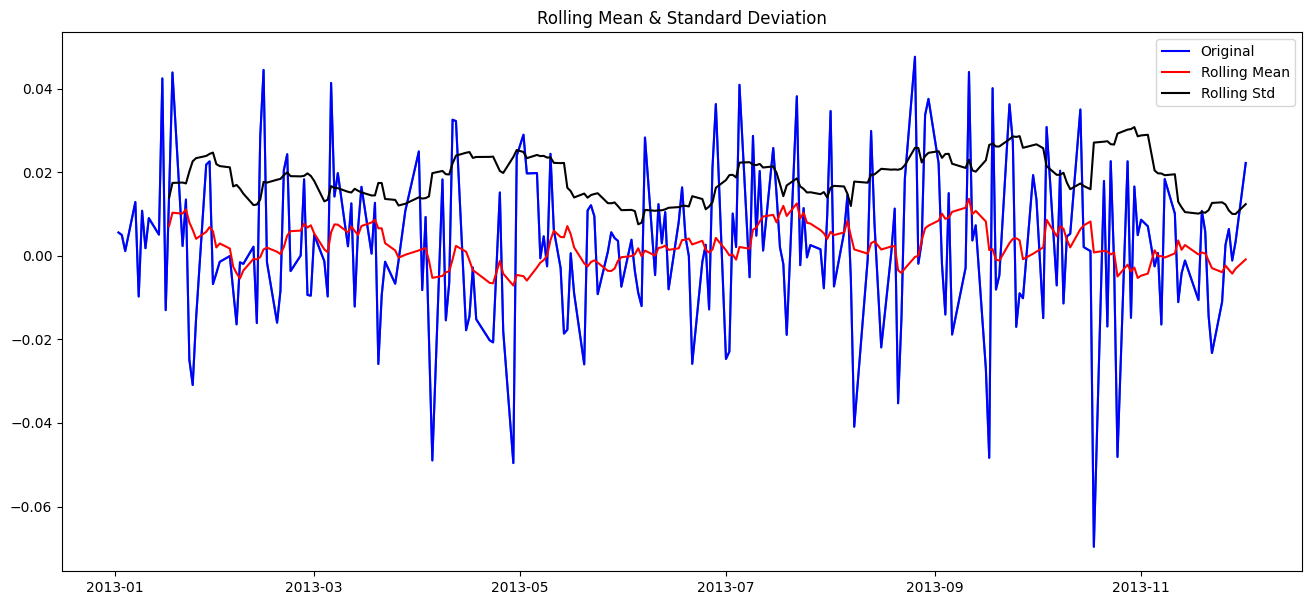

In [17]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift() # I will shift the time series by 1 and subtract from the original TS.
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [18]:
# Obsevation: After differnecing, there is no pattern in the mean. No upward trend.No standard.
#So, by the definition of stationarity, if I take a mean between 03-2013 and 05-2013, and 09-2013 and 11-2013,
#the mean and SD would almost similar. There wont be much differences.

In [19]:
# Why all the hard work of log transformation, square root and differencing? Because we want our TS to be stationary or else or model
# will  never forecast well.

In [20]:
HCLTechStockData.sort_index(inplace= True)

In [21]:
#After this we want to know what should be the order of AR component and MA component because we dont know by hand, what order suits better for our model. So perform ACF and PACF.

In [22]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

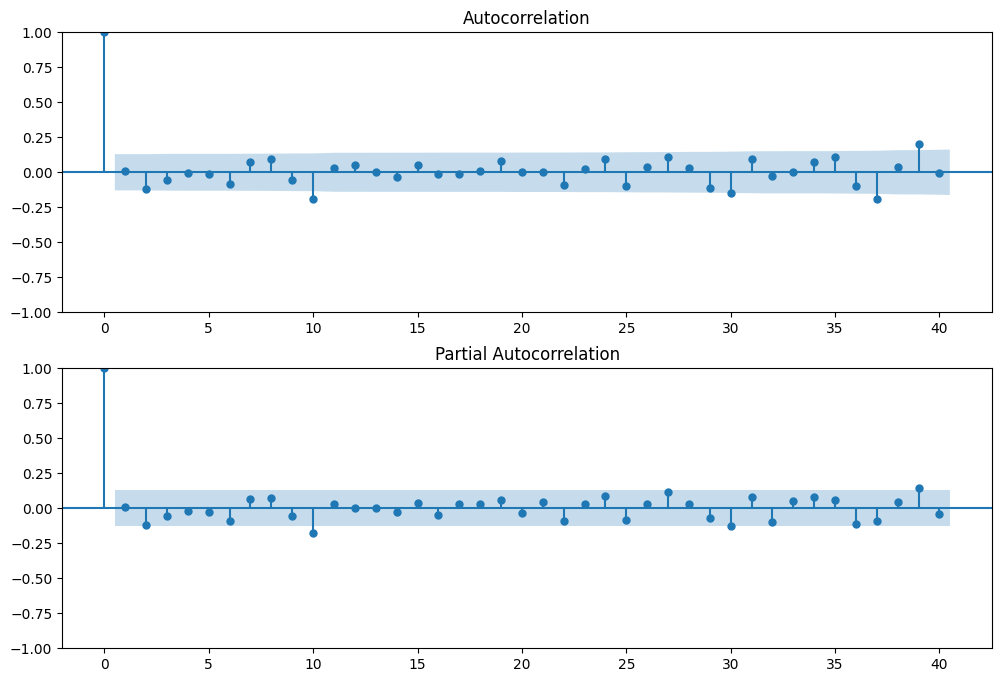

In [23]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [24]:
#Blue shaded line is CI. The 1st line crosses this blue line, is the order we want.

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
type(ts_log_diff)

pandas.core.series.Series

In [27]:
#ts_log_diff.dropna()
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

d:\Data Science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Data Science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Data Science\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Data Science\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


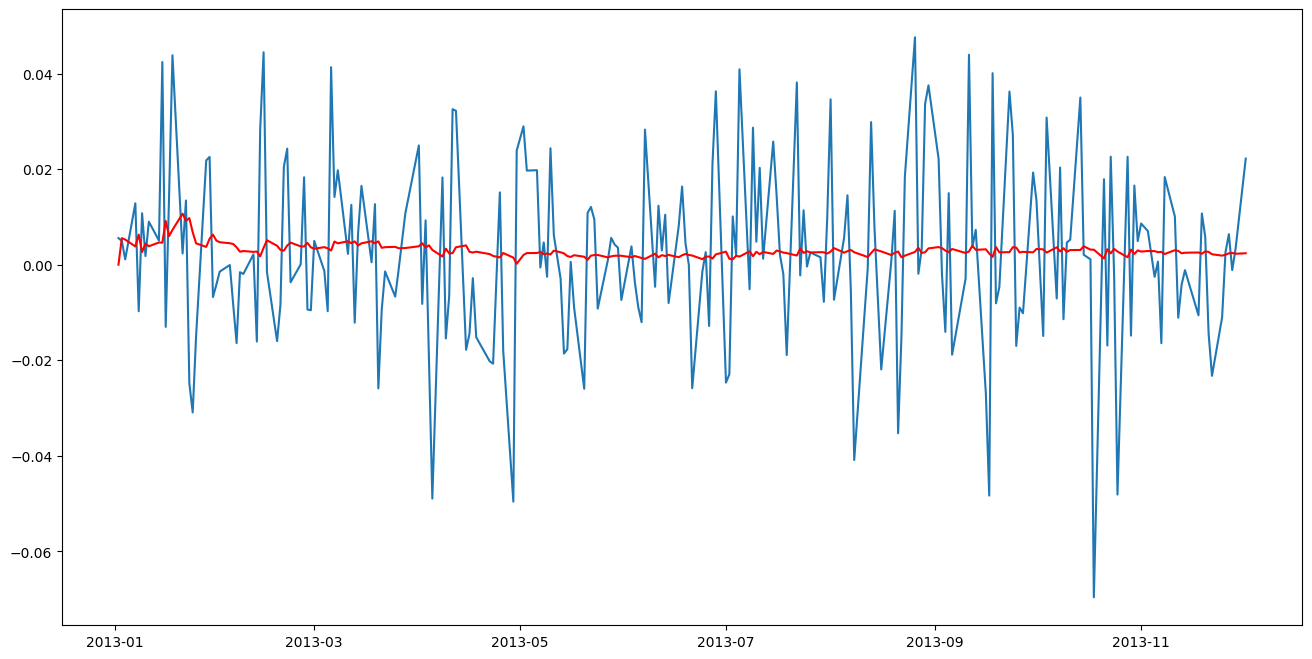

In [28]:
plt.figure(figsize=(16,8))
ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(0,1,2))
results_ARIMA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [29]:
#Youll notice Red line - actual line is scaled and differenced. And you have do the same for the orginal data as well.

# Taking results back to original scale

In [30]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.005259
2013-01-07    0.003818
2013-01-08    0.006299
dtype: float64


In [31]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head()) #2. Why cum sum? Because have taken the difference of our time series.

Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.010820
2013-01-07    0.014638
2013-01-08    0.020938
dtype: float64


In [32]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)#3. This addition is to compemsate for the differencing we did.
ARIMA_log_prediction.head()

Date
2013-01-01    6.427621
2013-01-02    6.427621
2013-01-03    6.433181
2013-01-04    6.438441
2013-01-07    6.442259
dtype: float64

Text(0.5, 1.0, 'RMSE: 95.0437')

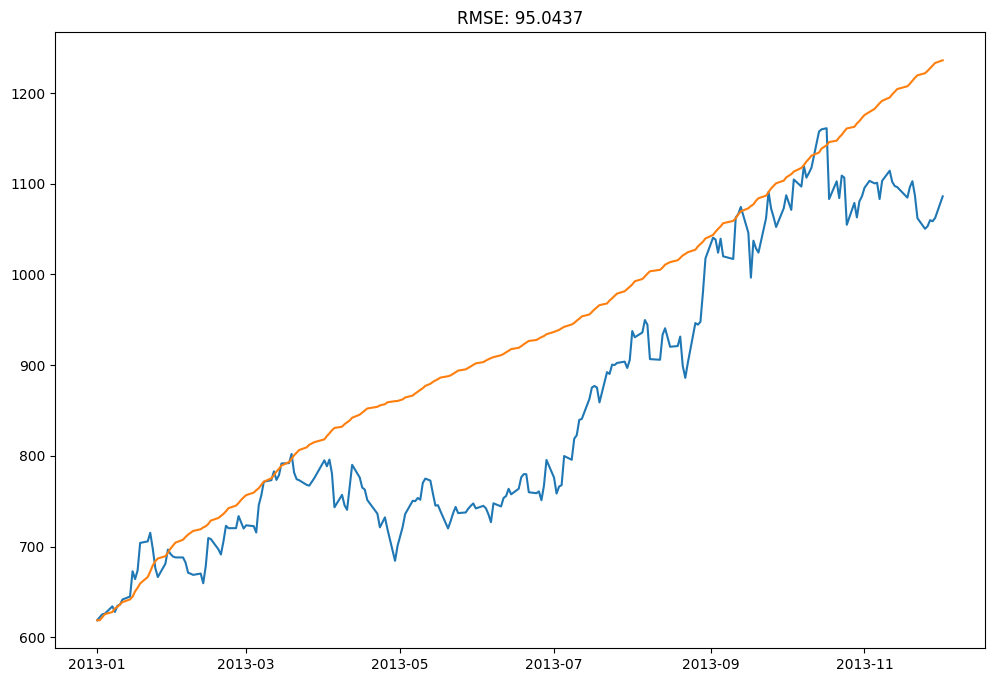

In [33]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction) #4. Why exp? BEcause that's the opposite of log.
plt.plot(HCLTechStockData)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-HCLTechStockData)**2)/len(HCLTechStockData)))

In [34]:
#Blue line is the actual value and orange line is the predicted values.
#Observations: The predicted one is not actualy capturing the complte properties of actual fluctions. Becasue we have choosen some random p,d and q.

In [35]:
results_ARIMA.predict(10,20) #From index no10 to index20, I want to predict. and these are the results.

Date
2013-01-16    0.009151
2013-01-17    0.005982
2013-01-18    0.007282
2013-01-21    0.010679
2013-01-22    0.009216
2013-01-23    0.009744
2013-01-24    0.006792
2013-01-25    0.004469
2013-01-28    0.003723
2013-01-29    0.005427
2013-01-30    0.006283
Name: predicted_mean, dtype: float64

In [36]:
import pmdarima as pm

def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                              start_p=3,
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [37]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1159.053, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1167.424, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1165.456, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1165.465, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1165.525, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1163.485, Time=0.28 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.925 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)